HM 2 Bowen

**[Part 1]**

In [6]:
import pandas as pd
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
data.head()

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


getting rid of not continuous variables and read and math score which were used to calculate the test score

In [140]:
data = data.loc[:, (data.columns != 'rownames')& (data.columns != 'county') & (data.columns != 'district') & (data.columns != 'grspan') & (data.columns != 'readscr')& (data.columns != 'mathscr')]
data.head()

,distcod,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,75119,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,61499,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,61549,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,61457,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,61523,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


Using Histograms to visualize univariate distribution

Target Variable

Text(0, 0.5, 'Count of Observations of Test Score')

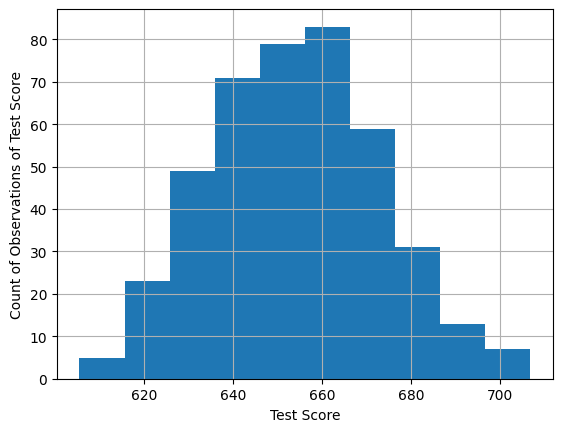

In [64]:
import matplotlib.pyplot as plt
data['testscr'].hist()
plt.xlabel('Test Score')
plt.ylabel('Count of Observations of Test Score')

I theorize that number of computers, teachers and expenditure per student are related to the test scores.

Text(0, 0.5, 'Count of Observations of Numbers of Teacher')

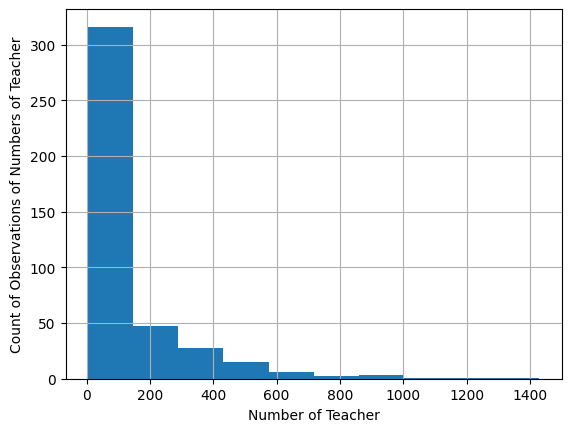

In [65]:
data['teachers'].hist()
plt.xlabel('Number of Teacher')
plt.ylabel('Count of Observations of Numbers of Teacher')

Text(0, 0.5, 'Count of Observations of Computer Number')

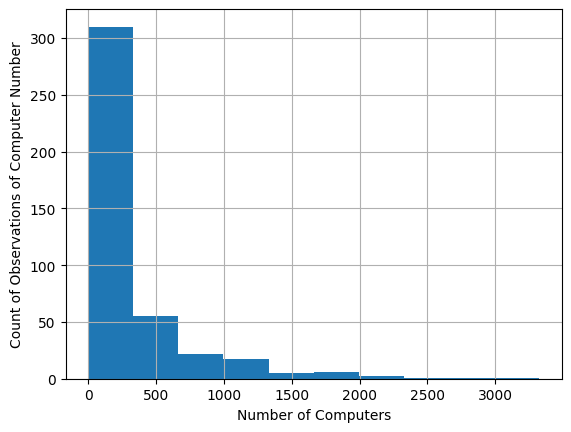

In [66]:
data['computer'].hist()
plt.xlabel('Number of Computers')
plt.ylabel('Count of Observations of Computer Number')

Text(0, 0.5, 'Count of Observations of Expenditure per Student')

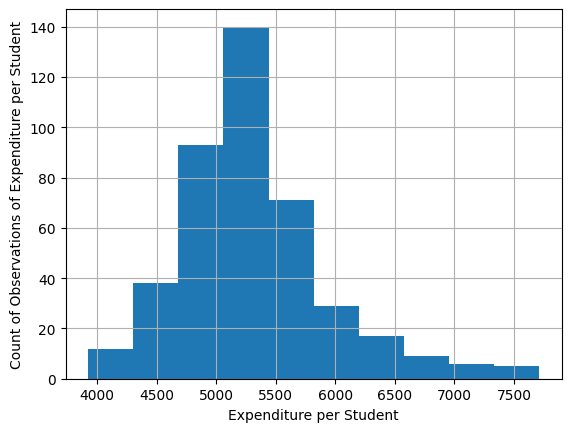

In [38]:
data['expnstu'].hist()
plt.xlabel('Expenditure per Student')
plt.ylabel('Count of Observations of Expenditure per Student')

Use Scatter Plot to Visualize Dependency

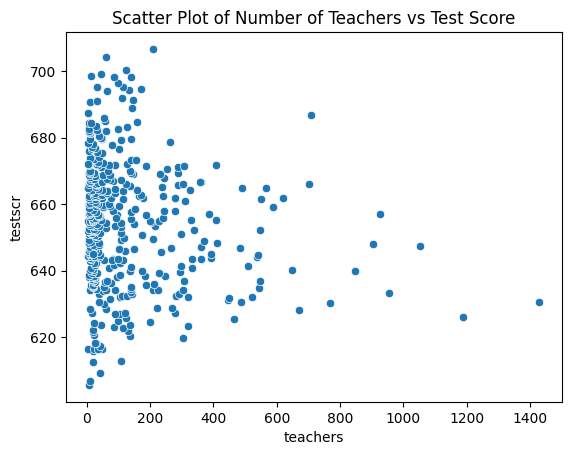

In [39]:
import seaborn as sns
sns.scatterplot(x='teachers', y='testscr', data=data)
plt.title('Scatter Plot of Number of Teachers vs Test Score')
plt.show()

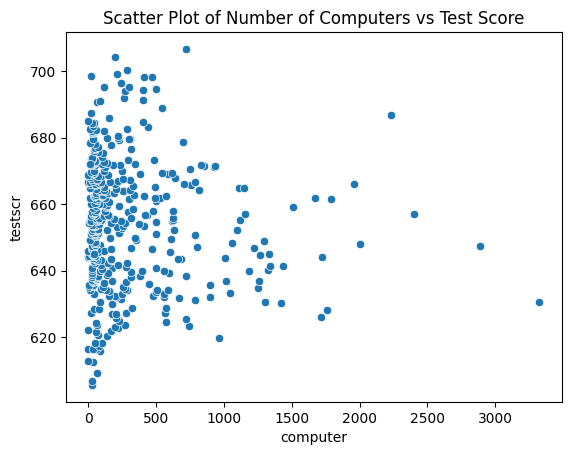

In [40]:
sns.scatterplot(x='computer', y='testscr', data=data)
plt.title('Scatter Plot of Number of Computers vs Test Score')
plt.show()

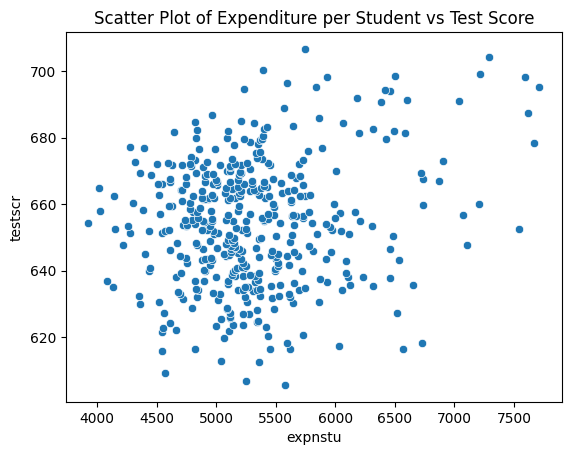

In [41]:
sns.scatterplot(x='expnstu', y='testscr', data=data)
plt.title('Scatter Plot of Expenditure per Student vs Test Score')
plt.show()

Create test split

In [141]:
y = data['testscr']
X = data.loc[:, data.columns != 'testscr']

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,distcod,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,75119,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,61499,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,61549,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,61457,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,61523,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X.shape)
X_train.shape

(420, 12)


(315, 12)

1. knn

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7527380015427565


KNN looks not very satisfying without standard scaler.
Without tuning and standard scaler, Lasso has the best test score.

Implementing standard scaler

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=5)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

print(knn_reg.score(X_test_scaled, y_test))

0.842197000830774


Much better

Tuning with GridSearch

In [146]:
from sklearn.model_selection import GridSearchCV
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y)

#create dictionary data object with keys equal to parameter name 'n_neighbors'
#for knn model and values equal to range of k values to create models for

param_grid = {'n_neighbors': np.arange(1, 15, 2)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)

#use model methods to fit score and predict model:
grid.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.121
best parameters: {'n_neighbors': 13}
test-set score: 0.027


best with k=7, test score improved

2. linear regression

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
# attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print(X_train.columns)  #column names to help identify output
print("\nlr.coef_: "+str(lr.coef_))  #combine some text with a vector of beta coefficients that are converted to string data to enable it to be printed
print("\nlr.intercept_: {}".format(lr.intercept_))  #combine some text and the intercept

Index(['distcod', 'enrltot', 'teachers', 'calwpct', 'mealpct', 'computer',
       'compstu', 'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')

lr.coef_: [-1.70462259e-04  2.41247060e-04 -1.03033331e-02 -1.18275084e-01
 -3.61074234e-01  2.45241913e-03 -2.18984104e+00  1.92827832e-03
 -3.86035232e-01  5.19720659e-01 -1.96553184e-01]

lr.intercept_: 675.8435514295219


In [155]:
# Let’s look at the training set and test set performance using r squared:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#cross validation - default is k fold, specify 10 folds and make sure scoring is based on r2
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring='r2')))   #print mean of the 10 values of r2 that are generated

Training set score: 0.81
Test set score: 0.80
0.7794190146852797


Using standard scaler

In [156]:
lr.fit(X_train_scaled, y_train)

print(X_train.columns)  #column names to help identify output
print("\nlr.coef_: "+str(lr.coef_))  #combine some text with a vector of beta coefficients that are converted to string data to enable it to be printed
print("\nlr.intercept_: {}".format(lr.intercept_))

Index(['distcod', 'enrltot', 'teachers', 'calwpct', 'mealpct', 'computer',
       'compstu', 'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')

lr.coef_: [ 0.31944861  0.37954695  1.44486521  0.9892395  -1.13517854 -1.59609866
 -1.56121465 -0.73783218  1.45266561 -2.93066447 -1.3809596   0.38800581]

lr.intercept_: 654.2720646933903


In [157]:
# Let’s look at the training set and test set performance using r squared:

print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

#cross validation - default is k fold, specify 10 folds and make sure scoring is based on r2
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10, scoring='r2')))   #print mean of the 10 values of r2 that are generated

Training set score: 0.05
Test set score: -0.04
-0.05286875336120998


doesn't seem to help

Tuning the model using GridSearch

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Define the parameter grid with parameters relevant to LinearRegression
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}

# Create GridSearchCV with LinearRegression and the updated parameter grid
grid = GridSearchCV(LinearRegression(), param_grid=param_grid, cv=10)

# Fit the model
grid.fit(X_train, y_train)

# Print the results
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.787
best parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
test-set score: 0.791


Test set score improved

3. Ridge Regressoion

In [159]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.79


using standard scaler

In [161]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

Training set score: 0.04
Test set score: -0.10


Little difference observed

Tuning using GridSearch

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {'alpha': [0.01, 0.1, 1, 10]} #np.arange creates sequence of numbers for each k value

# Create GridSearchCV with LinearRegression and the updated parameter grid
grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=10)

# Fit the model
grid.fit(X_train, y_train)

# Print the results
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.762
best parameters: {'alpha': 10}
test-set score: 0.828


Test Score improved with alpha 10

4. Lasso Regression

In [163]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("\nlasso.coef_: {}".format(lasso.coef_))

Training set score: 0.80
Test set score: 0.83
Number of features used: 9

lasso.coef_: [ 1.16282884e-04 -7.92964311e-04  1.04518354e-02 -5.14922292e-02
 -3.81352975e-01  2.57393694e-03  0.00000000e+00  1.61151286e-03
 -0.00000000e+00  5.67123723e-01 -2.11117893e-01]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+03, tolerance: 1.113e+01
  model = cd_fast.enet_coordinate_descent(


using standard scaler

In [164]:
lasso = Lasso().fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("\nlasso.coef_: {}".format(lasso.coef_))

Training set score: 0.02
Test set score: 0.00
Number of features used: 2

lasso.coef_: [-0.         -0.88254859 -0.         -0.          0.          0.
 -0.          1.28791121  0.         -0.         -0.          0.        ]


Doesn't seem to help

Tuning with GridSearch

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {'alpha': [0.01, 0.1, 1 ,10, 100]} #np.arange creates sequence of numbers for each k value

# Create GridSearchCV with LinearRegression and the updated parameter grid
grid = GridSearchCV(Lasso(max_iter=100000), param_grid=param_grid, cv=10)

# Fit the model
grid.fit(X_train, y_train)

# Print the results
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.780
best parameters: {'alpha': 1}
test-set score: 0.817


test score become a bit worse

Comparring Coefficient: My best ones are Lasso and Ridge

In [167]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and contain your data

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit Lasso Regression
lasso = Lasso().fit(X_train, y_train)
lasso_reg_coeff = lasso.coef_  # Store Lasso coefficients

# Fit Ridge Regression
ridge = Ridge().fit(X_train, y_train)
ridge_reg_coeff = ridge.coef_  # Store Ridge coefficients

print("Lasso Regression Coefficients:", lasso_reg_coeff)
print("Ridge Regression Coefficients:", ridge_reg_coeff)

coeff_df = pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(len(lasso_reg_coeff))],
    'Lasso Regression': lasso_reg_coeff,
    'Ridge Regression': ridge_reg_coeff
})

print(coeff_df)

Lasso Regression Coefficients: [ 7.52427821e-05 -8.89044789e-04  1.07273647e-02 -1.13697460e-01
 -3.58187935e-01  3.23249247e-03  0.00000000e+00  2.21712889e-03
 -0.00000000e+00  6.09393383e-01 -2.22602164e-01]
Ridge Regression Coefficients: [ 6.20745532e-05 -7.29337827e-04  1.02951931e-02 -1.21034856e-01
 -3.45404087e-01  2.17550876e-03  6.23417143e+00  1.52514824e-03
 -2.29136569e-01  6.56405473e-01 -2.26666478e-01]
       Feature  Lasso Regression  Ridge Regression
0    Feature 1          0.000075          0.000062
1    Feature 2         -0.000889         -0.000729
2    Feature 3          0.010727          0.010295
3    Feature 4         -0.113697         -0.121035
4    Feature 5         -0.358188         -0.345404
5    Feature 6          0.003232          0.002176
6    Feature 7          0.000000          6.234171
7    Feature 8          0.002217          0.001525
8    Feature 9         -0.000000         -0.229137
9   Feature 10          0.609393          0.656405
10  Feature 11   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+03, tolerance: 1.147e+01
  model = cd_fast.enet_coordinate_descent(


Lasso Regression report that "compter per student" and "student teacher ratio" has no effect on test results, which is not very Reasonable. As a result, I choose Ridge Regression as the final model to predict test score.

**[Part 2]**

Red wine

In [7]:
datared = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
datared.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


White wine

In [8]:
datawhite = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
datawhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Adding Columns winetype, red=1 white=0

datared['winetype'] = 1

In [9]:
datared['winetype'] = 1

In [10]:
datawhite['winetype'] = 0

In [11]:
datared.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [12]:
datawhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


Combining the two datasets

In [13]:
combined_df = pd.concat([datared, datawhite], ignore_index=True)

print(combined_df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [14]:
combined_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Visualize the univariate distribution of the target feature and each of the three explanatory variables. I assume volatile acidity, free sulfur dioxide, an total sulfur dioxide can be used to predict if the wine is red or white.

Text(0, 0.5, 'Count of Red and White Wine')

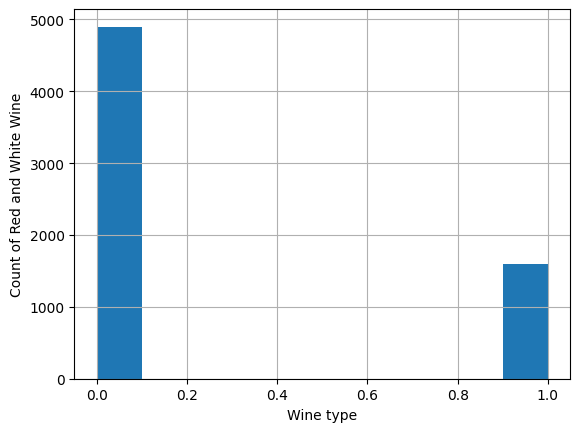

In [185]:
combined_df['winetype'].hist()
plt.xlabel('Wine type')
plt.ylabel('Count of Red and White Wine')

Text(0, 0.5, 'Count of Red and White Wine')

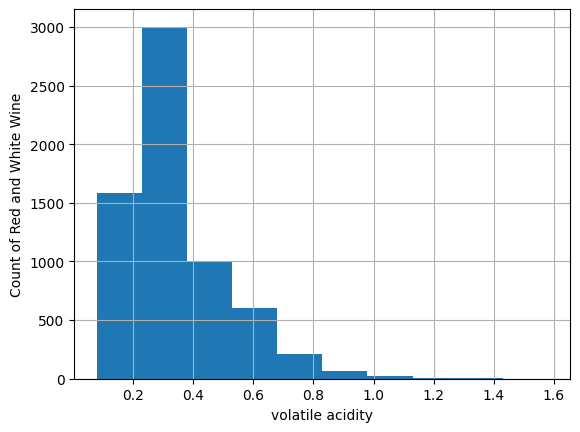

In [186]:
combined_df['volatile acidity'].hist()
plt.xlabel('volatile acidity')
plt.ylabel('Count of Red and White Wine')

Text(0, 0.5, 'Count of Red and White Wine')

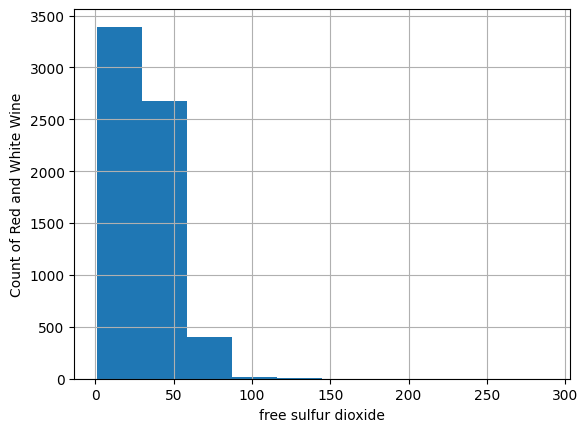

In [187]:
combined_df['free sulfur dioxide'].hist()
plt.xlabel('free sulfur dioxide')
plt.ylabel('Count of Red and White Wine')

Text(0, 0.5, 'Count of Red and White Wine')

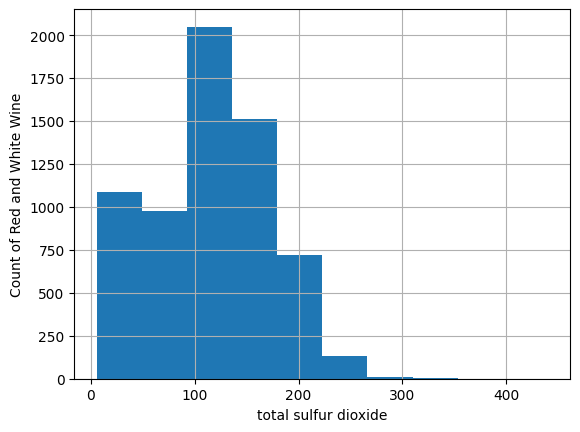

In [188]:
combined_df['total sulfur dioxide'].hist()
plt.xlabel('total sulfur dioxide')
plt.ylabel('Count of Red and White Wine')

Creating train data split

In [15]:
y = combined_df['winetype']
X = combined_df.loc[:, combined_df.columns != 'winetype']

print(y[0:5])
X.head()

0    1
1    1
2    1
3    1
4    1
Name: winetype, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X.shape)
X_train.shape

(6497, 12)


(4872, 12)

1. KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print(knn.score(X_test, y_test))

0.9372307692307692


Without tuning and standard scaler, logistic and penalized logistic regression have better accuracy.

Standard scaler

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=5)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

print(knn_reg.score(X_test_scaled, y_test))

0.9466789617325863


Results Improved

Tuning with GridSearch

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import KFold
import numpy as np
from statistics import mean

# Set up function parameters for different cross validation strategies
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

print("KFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=kfold))))

print("\nStratifiedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold))))

print("\nRepeatedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=rkf))))

KFold:
0.9384225767387985

StratifiedKFold:
0.9392428789554046

RepeatedKFold:
0.9391626599273416


Results improved.

2. Logistic Regression

In [25]:
# Set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty=None, max_iter=100000).fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test) # predictions for y
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[ 1.58294549e+00  1.47351867e+01  9.09859634e-03 -1.23662966e-01
   3.74468703e+01  5.75797136e-02 -7.72808748e-02 -2.31961866e+01
   1.07407017e+01  1.09577797e+01 -6.00508218e-01  4.37415840e-02]]
Training set score: 0.991
Test set score: 0.983
logreg.predict: [0 0 1 ... 0 0 1]


Standard Scaler

In [26]:
logreg = LogisticRegression(penalty=None, max_iter=100000).fit(X_train_scaled, y_train)

print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

predicted_vals = logreg.predict(X_test_scaled) # predictions for y
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[-0.04391547  1.54559428 -0.35563027 -5.236428    1.07220625  1.15845134
  -3.6260785   4.77146161  0.2049118   0.9798056   1.23000558  0.40335558]]
Training set score: 0.995
Test set score: 0.990
logreg.predict: [0 0 1 ... 0 0 1]


Results improved

Tuning with GridSearch

In [30]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV # Import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {'solver': ['liblinear', 'saga']}

# Create GridSearchCV with LinearRegression and the updated parameter grid
grid = GridSearchCV(LogisticRegression(max_iter=100000), param_grid=param_grid)

# Fit the model
grid.fit(X_train, y_train)

# Print the results
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.982
best parameters: {'solver': 'liblinear'}
test-set score: 0.976


Doesn't seem to help

3. Penalized Logistic Regression

In [196]:
# Set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100, penalty='l2', max_iter=100000).fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test) # predictions for y
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[  1.45375218  10.45554972  -2.31884578  -0.11894495  33.22619071
    0.05869041  -0.06292428 -17.95641413   8.82637118   8.2868113
   -0.3301371    0.10338052]]
Training set score: 0.989
Test set score: 0.985
logreg.predict: [0 1 1 ... 0 1 0]


Standard Scaler

In [205]:
logreg = LogisticRegression(C=100, penalty='l2', max_iter=100000).fit(X_train_scaled, y_train)

print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

predicted_vals = logreg.predict(X_test_scaled) # predictions for y
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[ 0.01041989  1.04593249 -0.65508952 -5.48773101  1.04383708  1.27171869
  -2.89021066  5.10222849 -0.01653455  0.48885689  2.04161791  0.44635151]]
Training set score: 0.994
Test set score: 0.992
logreg.predict: [1 1 1 ... 0 1 0]


Results improved

Tuning

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

# Create GridSearchCV with LinearRegression and the updated parameter grid
grid = GridSearchCV(LogisticRegression(max_iter=100000), param_grid=param_grid)

# Fit the model
grid.fit(X_train, y_train)

# Print the results
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.986
best parameters: {'penalty': 'l1', 'solver': 'liblinear'}
test-set score: 0.985


Doesn't seem to help

Compare coefficients

In [33]:
# Assuming X and y are already defined and contain your data

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit Lasso Regression
logreg = LogisticRegression(penalty=None, max_iter=100000).fit(X_train_scaled, y_train)
logreg_coeff = logreg.coef_[0]  # Store Lasso coefficients, extract the first row to make it 1D

# Fit Ridge Regression
logregp = LogisticRegression(C=100, penalty='l2', max_iter=100000).fit(X_train, y_train)
logregp_coeff = logregp.coef_[0]  # Store Ridge coefficients, extract the first row to make it 1D


print("Logistic Regression Coefficients:", logreg_coeff)
print("Penalized Logistic Regression Coefficients:", logregp_coeff)

coeff_df = pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(len(logreg_coeff))],
    'Logistic Regression': logreg_coeff,
    'Penalzied Logistic Regression': logregp_coeff
})

print(coeff_df)

Logistic Regression Coefficients: [-0.02225742  0.08342955  0.04328927  0.05783039 -0.00436517 -0.09392843
  0.0200197  -0.08713083 -0.01731317  0.10133683 -0.02635935 -0.01586152]
Penalized Logistic Regression Coefficients: [  1.47974493  11.08374314  -0.15586079  -0.07674333  31.66981352
   0.0399527   -0.06500336 -19.11863981   9.47903445   8.50147808
  -0.41125018   0.11634297]
       Feature  Logistic Regression  Penalzied Logistic Regression
0    Feature 1            -0.022257                       1.479745
1    Feature 2             0.083430                      11.083743
2    Feature 3             0.043289                      -0.155861
3    Feature 4             0.057830                      -0.076743
4    Feature 5            -0.004365                      31.669814
5    Feature 6            -0.093928                       0.039953
6    Feature 7             0.020020                      -0.065003
7    Feature 8            -0.087131                     -19.118640
8    Feature

Penalized Logistic Regression suggests that chlorides and density can be used to predict if the wine is white or red, which isn't what we observed from the dataset. As a result, I suggest Logistic Regression is the better one to predict wine type.